In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection # for splitting the data into training and testing data
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Any results you write to the current directory are saved as output.

In [76]:
train_data = pd.read_csv("autos.csv" ,encoding = "ISO-8859-1" )

In [77]:
print(train_data.shape)

(371528, 20)


*Let's understand the data in deep*

In [78]:
train_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [79]:
train_data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [80]:
train_data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

5 columns have nan values

## Look at the seller column

In [81]:
train_data["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

Only 3 belong to second seller , this is interesting and also we get to know this feature has not of any use

In [82]:
del train_data["seller"]

## Look at  the offerType column

In [83]:
train_data["offerType"].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

Again second offerType has only 12 entries , we should remove this column 

In [84]:
del train_data["offerType"]

In [85]:
train_data.head(3) 

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


**Look at the nrOfPictures column**

In [86]:
train_data["nrOfPictures"].value_counts()

0    371528
Name: nrOfPictures, dtype: int64

this column only take one value i.e., 0 , so i think there is no advantage of consider this column in our dataset

In [87]:
del train_data["nrOfPictures"]

## Look at the abtest column

In [88]:
train_data["abtest"].value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

Both values are popular , we should keep this column

## Let's inspect the date features

In [89]:
train_data[ ["dateCrawled","dateCreated","lastSeen"] ].head()

,dateCrawled,dateCreated,lastSeen
0,2016-03-24 11:52:17,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21


These dates basically represent when was the ads crawled , or time of lastseen of these ads , we will not able to collect much information from these dates so it's better to remove them

In [90]:
train_data = train_data.drop(["dateCrawled","dateCreated","lastSeen"] , axis=1 )

In [91]:
train_data.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,70435
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,66954
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,90480
3,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437


## Come to the name column

In [92]:
train_data["name"].head()

0                        Golf_3_1.6
1              A5_Sportback_2.7_Tdi
2    Jeep_Grand_Cherokee_"Overland"
3                GOLF_4_1_4__3TÜRER
4    Skoda_Fabia_1.4_TDI_PD_Classic
Name: name, dtype: object

name only represent the name of the car which is useless here

In [93]:
del train_data["name"]

In [94]:
train_data.isnull().sum()

price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
postalCode                 0
dtype: int64

## Now It's time to fill the NaN in columns 
## 1) gearbox
## 2) notRepairedDamage
## 3) fuelType
## 4) VehicleType
## 5) Model

In [95]:
train_data["gearbox"].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

There are two types of gearbox but frequency of manuell is higher than automatik but we cannot fill nan values with maxFreq value , so let's see how can we fill it

In [96]:
# we can see brand column has no nans
train_data["brand"].isnull().sum()

0

In [97]:
#so we will use brand column to fill gearbox values
train_data.groupby("brand")["gearbox"].value_counts()

brand       gearbox  
alfa_romeo  manuell       2064
            automatik      146
audi        manuell      20841
            automatik    10698
bmw         manuell      25323
                         ...  
trabant     automatik        2
volkswagen  manuell      64655
            automatik    10264
volvo       manuell       2217
            automatik      991
Name: gearbox, Length: 80, dtype: int64

In [98]:
gearbox = train_data["gearbox"].unique()
brand = train_data["brand"].unique()
d = {}

for i in brand :
    m = 0
    for j in gearbox :
        if train_data[(train_data.gearbox == j) & (train_data.brand == i)].shape[0] > m :
            m = train_data[(train_data.gearbox == j) & (train_data.brand == i)].shape[0]
            d[i] = j
        

In [99]:
for i in brand :
    train_data.loc[(train_data.brand == i) & (train_data.gearbox.isnull()) ,"gearbox" ] = d[i]


In [100]:
# no nans in gearbox
train_data["gearbox"].isnull().sum()

0

## let's look at the notRepairedDamage

In [101]:
train_data["notRepairedDamage"].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [102]:
train_data["notRepairedDamage"].isnull().sum()

72060

72060 values are nans and we can see 'nein' value is more frequent than 'ja' , so we can fillna with maxFreq value bcz this column is not much indicating much importance

In [103]:
train_data["notRepairedDamage"].fillna("nein",inplace = True)

In [104]:
train_data["notRepairedDamage"].isnull().sum()

0

**Let's handle the NaN in FuelType**

In [105]:
train_data["fuelType"].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

we can see only benzin and diesel are more frequent  ,  for now lets fill it with 'benzin'

In [106]:
train_data["fuelType"].fillna("benzin",inplace = True)

In [107]:
train_data.isnull().sum()

price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                    0
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType                   0
brand                      0
notRepairedDamage          0
postalCode                 0
dtype: int64

**now fill the vehicleType nan**

In [108]:
train_data["vehicleType"].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

here no particular value is more frequent , all top 3 types are frequent

In [109]:
# we can fill according to the fuelType values
train_data.groupby("fuelType")["vehicleType"].value_counts()

fuelType  vehicleType
andere    limousine         51
          andere            44
          kleinwagen        29
          kombi             25
          bus               10
          suv                9
          cabrio             6
          coupe              3
benzin    kleinwagen     72531
          limousine      66300
          kombi          31350
          cabrio         20769
          coupe          15935
          bus            10795
          suv             5400
          andere          1786
cng       bus              240
          kombi            136
          kleinwagen        80
          limousine         40
          andere            14
          suv                4
          cabrio             3
          coupe              3
diesel    kombi          34848
          limousine      27648
          bus            18622
          suv             8665
          kleinwagen      6808
          coupe           2737
          cabrio          1871
          andere 

here we see different fuelType correspond to different vehicleType

In [110]:
vehicleType = train_data["vehicleType"].unique()
fuelType = train_data["fuelType"].unique()
print(fuelType)
print(vehicleType)
#remove nan 
vehicleType = np.delete(vehicleType,0)

['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']


In [111]:
d = {}
for i in fuelType :
    m = 0
    for j in vehicleType :
        if train_data[(train_data.vehicleType == j) & (train_data.fuelType == i)].shape[0] > m :
            m = train_data[(train_data.vehicleType == j) & (train_data.fuelType == i)].shape[0]
            d[i] = j

In [112]:
for i in fuelType :
    train_data.loc[(train_data.fuelType == i) & (train_data.vehicleType.isnull()) ,"vehicleType" ] = d[i]


In [113]:
train_data["vehicleType"].isnull().sum()

0

**Lets fill the model**

In [114]:
len(train_data["model"].unique())

252

Too much unique values in model type lets find the maximum frequency value

In [115]:
train_data["model"].unique()[0]

'golf'

Golf occuring max times , lets fill it with golf

In [116]:
train_data["model"].fillna("golf",inplace =True)

In [117]:
train_data.isnull().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
dtype: int64

Hurrah all nans have been removed

In [118]:
train_data.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,480,test,kleinwagen,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein,70435
1,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,66954
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein,90480
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437


## Lets look at the postal code 

In [119]:
train_data["postalCode"].head()

0    70435
1    66954
2    90480
3    91074
4    60437
Name: postalCode, dtype: int64

Postalcode is not much giving much importance so lets remove this column

In [120]:
del train_data["postalCode"]

## It's time to convert string into integers

In [121]:
from sklearn.preprocessing import LabelEncoder

In [155]:
data = train_data.copy()
train_data.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,kleinwagen,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein
1,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [151]:
data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["model"] =LabelEncoder().fit_transform(data["model"])
data["abtest"] =LabelEncoder().fit_transform(data["abtest"])

data.head(60)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,1,4,1993,1,0,118,150000,0,1,38,1
1,18300,1,3,2011,1,190,118,125000,5,3,1,0
2,9800,1,7,2004,0,163,119,125000,8,3,14,1
3,1500,1,4,2001,1,75,118,150000,6,1,38,1
4,3600,1,4,2008,1,69,103,90000,7,3,31,1
5,650,1,6,1995,1,102,11,150000,10,1,2,0
6,2200,1,2,2004,1,109,8,150000,8,1,25,1
7,0,1,6,1980,1,50,40,40000,7,1,38,1
8,14500,0,1,2014,1,125,61,30000,8,1,10,1
9,999,1,4,1998,1,101,118,150000,0,1,38,1


## Outliers Removal

In [124]:
# analysis year o registration
data["yearOfRegistration"].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

We can see yearOfRegistration goes from 1000 to 9999  but 50% of the values are nearby 1999

In [125]:
data[data.yearOfRegistration > 2017].shape

(4134, 12)

In [126]:
data[data.yearOfRegistration < 1950].shape

(289, 12)

So only 289 registration are there before 1950 and 4000 registration after 2017 , so these are outliers and should be removed for better results

In [127]:
data = data[(data.yearOfRegistration < 2017)  & (data.yearOfRegistration > 1950)]

In [128]:
# now lets look at the price
data["price"].describe()

count    3.565370e+05
mean     1.739899e+04
std      3.658497e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.999000e+03
75%      7.400000e+03
max      2.147484e+09
Name: price, dtype: float64

price starts from 0 and goes upto max 2.147484e+09 , but the price 0 is unrealistic

In [129]:
data[data.price < 100].shape

(12372, 12)

In [130]:
data[data.price > 200000].shape

(158, 12)

only 158 values are there above 2 lakh and 12000 enries below 100, lets remove them

In [131]:
data = data[(data.price > 100) & (data.price < 200000) ]

In [132]:
# lets seperate the output and input
y  = data["price"]
x =  data.drop(labels=["price","model","abtest","brand"],axis=1)
x.head()

,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,notRepairedDamage
0,4,1993,1,0,150000,0,1,1
1,3,2011,1,190,125000,5,3,0
2,7,2004,0,163,125000,8,3,1
3,4,2001,1,75,150000,6,1,1
4,4,2008,1,69,90000,7,3,1


## Lets split the data into training and testing data

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [134]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)

dt_reg.fit(x_train, y_train)
y_pred=dt_reg.predict(x_test)
print("Decision Tree Score on Training set is",dt_reg.score(x_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(x_test, y_test))#Testing Accuracy

Decision Tree Score on Training set is 0.9780869423975163
Decision Tree Score on Test Set is 0.6537281560184612


In [135]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

accuracies = cross_val_score(dt_reg, x_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

[0.64820732 0.67103996 0.64975367 0.61781354 0.61767186]
Accuracy: 64.09 %
Standard Deviation: 2.06 %
Mean Absolute Error: 1785.7005906169413
Mean Squared Error: 25344203.937449083
RMSE: 5034.3027260435065
The r2_score is 0.6537281560184612


In [136]:
# classifier
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)

rfr.score(x_test, y_test)

0.7777120413245329

In [137]:

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1540.7811668626903
Mean Squared Error: 16269620.113296445
RMSE: 4033.5617155680716
The r2_score is 0.7777120413245329


In [138]:
print(y_pred[:10])
print(y_test.values[:10])


[9558.36428571  856.13666667 8326.88963095 1186.06490476 2901.71
 6567.93124206  722.34888167 1675.47083333 2527.145      1544.23400984]
[9900  550 8750 1850 2350 4599  850 1250 2300 1450]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


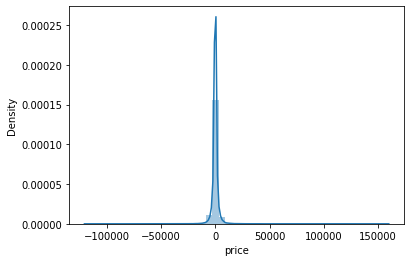

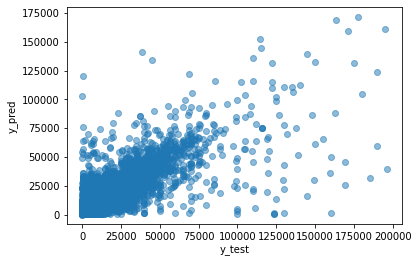

In [139]:
import matplotlib.pyplot as plt

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [140]:
import pickle
pickle.dump(rfr, open("rfr.pkl", "wb"))

# load model from file
model = pickle.load(open("rfr.pkl", "rb"))



In [145]:
x_test.head(10)

,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,notRepairedDamage
141530,5,2011,1,140,150000,8,3,1
334137,5,1998,1,122,150000,10,1,0
355153,4,2012,1,82,30000,2,1,1
323599,4,2000,1,64,150000,9,3,1
341931,7,2004,0,125,150000,4,3,0
269260,6,2007,1,105,150000,10,3,1
23013,4,2016,1,0,150000,8,1,0
204612,4,2002,1,83,150000,9,1,1
196984,4,2003,1,75,70000,11,1,1
217238,4,2003,1,50,150000,2,1,1


In [142]:
y_test.head()

141530    9900
334137     550
355153    8750
323599    1850
341931    2350
Name: price, dtype: int64

In [144]:
model.predict([[5,	2011,	1	,140,	150000,	8	,3,	1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([9558.36428571])